In [29]:
#usual imports
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sci
import math
import statistics as stats
from astropy.table import Table

from astropy.io import fits

In [30]:
SFdata = fits.open("everything_withr23.fits")#file with radius and metallicity info
SFdata = SFdata[1].data
SFdata_zcut = SFdata[(SFdata['Z_1'] < 0.06)]#redshift cut(not always necessary, depending on your sample)

In [31]:
mass = SFdata['log_Mass']#pull out mass column

#split into 0.25dex bins of mass 
low1 = SFdata[(mass < 9.25)]
low2 = SFdata[(mass > 9.25) & (mass < 9.5)]
low3 = SFdata[(mass > 9.5) & (mass < 9.75)]
low4 = SFdata[(mass > 9.75) & (mass < 10)]
mid1 = SFdata[(mass > 10) & (mass < 10.25)]
mid2 = SFdata[(mass > 10.25) & (mass < 10.5)]
mid3 = SFdata[(mass > 10.5) & (mass < 10.75)]
mid4 = SFdata[(mass > 10.75) & (mass < 11)]
high1 = SFdata[(mass > 11) & (mass < 11.25)]
high2 = SFdata[(mass > 11.25)]

In [48]:
def radius_metal(cut): 
    #my data has 35 radial bins per galaxy (i.e. 35 radii values and 35 metal values per galaxy)
    radius = cut['o3n2_radius']
    metal = cut['o3n2_metallicity']#metallicity from any calibrator
    #clear out nan values
    radius = radius[np.logical_not(np.isnan(metal))]
    metal = metal[np.logical_not(np.isnan(metal))]
    return radius, metal

In [49]:
low1_radius, low1_metal = radius_metal(low1)
low2_radius, low2_metal = radius_metal(low2)
low3_radius, low3_metal = radius_metal(low3)
low4_radius, low4_metal = radius_metal(low4)

mid1_radius, mid1_metal = radius_metal(mid1)
mid2_radius, mid2_metal = radius_metal(mid2)
mid3_radius, mid3_metal = radius_metal(mid3)
mid4_radius, mid4_metal = radius_metal(mid4)

high1_radius, high1_metal = radius_metal(high1)
high2_radius, high2_metal = radius_metal(high2)

In [50]:
def plotting(x, y):
    bins = 35 #can change based on what you need
    drange = [0,3]#not all galaxies go all the way out to 3 effective radii, but this ensures you catch them all
    y_median,x_median,binnumber = sci.binned_statistic(x,y,bins = bins, range = drange, statistic = 'median')
    y_std,x_median,binnumber = sci.binned_statistic(x,y,bins = bins, range = drange, statistic = 'std')
    avcount, x_median, binnumber = sci.binned_statistic(x, y, bins = bins, range = drange, statistic = 'count')
    avcount = np.array(avcount)
    #remove bins where there are fewer than 12 galaxies
    plt_x = x_median[:-1]+(x_median[1]-x_median[0])/2.0
    plt_x = plt_x[avcount >12]
    plt_y = y_median[avcount >12]
    pltsig = y_std[avcount >12]
    avcount = avcount[avcount > 12]
    return plt_x, plt_y, pltsig, avcount

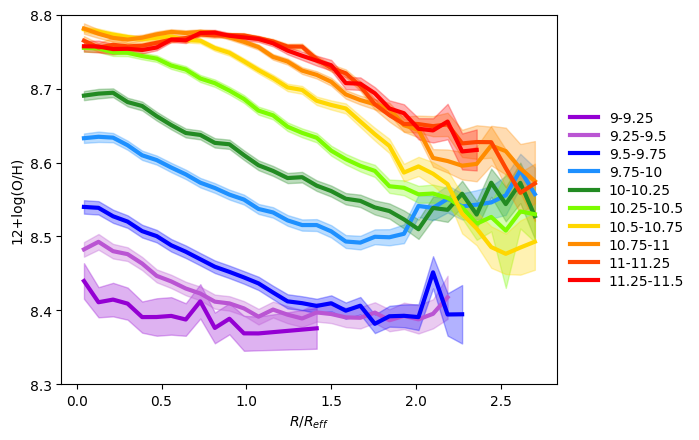

In [53]:
#'low'
low1_radius_2, low1_metal_median, low1_pltsig, low1_avcount = plotting(low1_radius, low1_metal)
plt.plot(low1_radius_2, low1_metal_median, linewidth = 3, label = '9-9.25', color = 'darkviolet')
plt.fill_between(low1_radius_2,low1_metal_median - (low1_pltsig/np.sqrt(low1_avcount)), low1_metal_median + (low1_pltsig/np.sqrt(low1_avcount)), alpha = 0.3, color = 'darkviolet')

low2_radius_2, low2_metal_median, low2_pltsig, low2_avcount = plotting(low2_radius, low2_metal)
plt.plot(low2_radius_2, low2_metal_median, linewidth = 3, label = '9.25-9.5', color = 'mediumorchid')
plt.fill_between(low2_radius_2,low2_metal_median - (low2_pltsig/np.sqrt(low2_avcount)), low2_metal_median + (low2_pltsig/np.sqrt(low2_avcount)), alpha = 0.3, color = 'mediumorchid')

low3_radius_2, low3_metal_median, low3_pltsig, low3_avcount = plotting(low3_radius, low3_metal)
plt.plot(low3_radius_2, low3_metal_median, linewidth = 3, label = '9.5-9.75', color = 'blue')
plt.fill_between(low3_radius_2,low3_metal_median - (low3_pltsig/np.sqrt(low3_avcount)), low3_metal_median + (low3_pltsig/np.sqrt(low3_avcount)), alpha = 0.3, color = 'blue')

low4_radius_2, low4_metal_median, low4_pltsig, low4_avcount = plotting(low4_radius, low4_metal)
plt.plot(low4_radius_2, low4_metal_median, linewidth = 3, label = '9.75-10', color = 'dodgerblue')
plt.fill_between(low4_radius_2,low4_metal_median - (low4_pltsig/np.sqrt(low4_avcount)), low4_metal_median + (low4_pltsig/np.sqrt(low4_avcount)), alpha = 0.3, color = 'dodgerblue')

#'medium'
mid1_radius_2, mid1_metal_median, mid1_pltsig, mid1_avcount = plotting(mid1_radius, mid1_metal)
plt.plot(mid1_radius_2, mid1_metal_median, linewidth = 3, label = '10-10.25', color = 'forestgreen')
plt.fill_between(mid1_radius_2,mid1_metal_median - (mid1_pltsig/np.sqrt(mid1_avcount)), mid1_metal_median + (mid1_pltsig/np.sqrt(mid1_avcount)), alpha = 0.3, color = 'forestgreen')

mid2_radius_2, mid2_metal_median, mid2_pltsig, mid2_avcount = plotting(mid2_radius, mid2_metal)
plt.plot(mid2_radius_2, mid2_metal_median, linewidth = 3, label = '10.25-10.5', color = 'lawngreen')
plt.fill_between(mid2_radius_2,mid2_metal_median - (mid2_pltsig/np.sqrt(mid2_avcount)), mid2_metal_median + (mid2_pltsig/np.sqrt(mid2_avcount)), alpha = 0.3, color = 'lawngreen')

mid3_radius_2, mid3_metal_median, mid3_pltsig, mid3_avcount = plotting(mid3_radius, mid3_metal)
plt.plot(mid3_radius_2, mid3_metal_median, linewidth = 3, label = '10.5-10.75', color = 'gold')
plt.fill_between(mid3_radius_2,mid3_metal_median - (mid3_pltsig/np.sqrt(mid3_avcount)), mid3_metal_median + (mid3_pltsig/np.sqrt(mid3_avcount)), alpha = 0.3, color = 'gold')

mid4_radius_2, mid4_metal_median, mid4_pltsig, mid4_avcount = plotting(mid4_radius, mid4_metal)
plt.plot(mid4_radius_2, mid4_metal_median, linewidth = 3, label = '10.75-11', color = 'darkorange')
plt.fill_between(mid4_radius_2,mid4_metal_median - (mid4_pltsig/np.sqrt(mid4_avcount)), mid4_metal_median + (mid4_pltsig/np.sqrt(mid4_avcount)), alpha = 0.3, color = 'darkorange')

#'high'
high1_radius_2, high1_metal_median, high1_pltsig, high1_avcount = plotting(high1_radius, high1_metal)
plt.plot(high1_radius_2, high1_metal_median, linewidth = 3, label = '11-11.25', color = 'orangered')
plt.fill_between(high1_radius_2,high1_metal_median - (high1_pltsig/np.sqrt(high1_avcount)), high1_metal_median + (high1_pltsig/np.sqrt(high1_avcount)), alpha = 0.3, color = 'darkorange')

high2_radius_2, high2_metal_median, high2_pltsig, high2_avcount = plotting(high2_radius, high2_metal)
plt.plot(high2_radius_2, high2_metal_median, linewidth = 3, label = '11.25-11.5', color = 'red')
plt.fill_between(high2_radius_2,high2_metal_median - (high2_pltsig/np.sqrt(high2_avcount)), high2_metal_median + (high2_pltsig/np.sqrt(high2_avcount)), alpha = 0.3, color = 'red')

plt.ylim(8.3, 8.8)
plt.xlabel(r'$ R/R_{eff}$')
plt.ylabel("12+log(O/H)")
plt.legend(bbox_to_anchor=(1, 0.5), loc = 'center left', frameon = False, labelspacing = 0.3)

belfiore_recreate_median_name = 'Plots/O3N2_belfiore_recreate_median.pdf'
plt.savefig(belfiore_recreate_median_name, bbox_inches='tight')